In [146]:
import json
with open('/Users/kshadi3/Documents/ROIs/colors.json') as f:
    colors = json.load(f)
with open('/Users/kshadi3/Documents/ROIs/texts.json') as f:
    txts = json.load(f)
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [50]:
from PIL import Image
from matplotlib import pyplot as plt
import pickle as pk
from pyALT import *

In [33]:
hex_to_rgb(colors['VISp'])

(255, 0, 0)

In [6]:
import scipy.misc
import numpy as np

In [7]:
roi_dir = '/Users/kshadi3/Documents/ROIs/'
from os import listdir
from os.path import isfile, join
def load_rois():
    tmp = [f for f in listdir(roi_dir) if (isfile(join(roi_dir, f)) and '.png' in f and 'source_' in f)]
    rois = [xx.split('_')[-1].split('.')[0] for xx in tmp]
    db = {}
    for i,w in enumerate(tmp):
        roi = read_roi(join(roi_dir,w))
        db[rois[i]] = roi
    return db

def read_roi(fp):
    im = scipy.misc.imread(fp, flatten=False, mode='RGBA')
    m,n,c = im.shape
    roi = np.zeros((m,n),dtype='int8')
    for i in range(m):
        for j in range(n):
            tmp = tuple(im[i,j])
            if tmp[-1]>0:
                roi[i,j] = 1
    return roi

def union_rois(db,rois,val=1):
    out = db[rois[0]]
    for w in rois[1:]:
        out = out + db[w]
    out[out>0] = val
    return out
rois = load_rois()

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [13]:
m,n = rois['VISp'].shape

In [77]:
base = '/Users/kshadi3/Dropbox/Constantine-Majid/'
animals = {
    'd':'Animal_D_M022311',
    'e':'Animal_E_M090611',
    'c':'Animal_C_M022111',
    'b':'Animal_B_M021811',
    'a':'Animal_A_M022411'
}
_animal = 'e'
animal = animals[_animal]
mask = vsd.load_mask(animal)
with open(base+animal+'/tx.pk','rb') as f:
    tx = pk.load(f)

FRP
ACAd
PL
TEa
VISpor
RSPv
VISpl


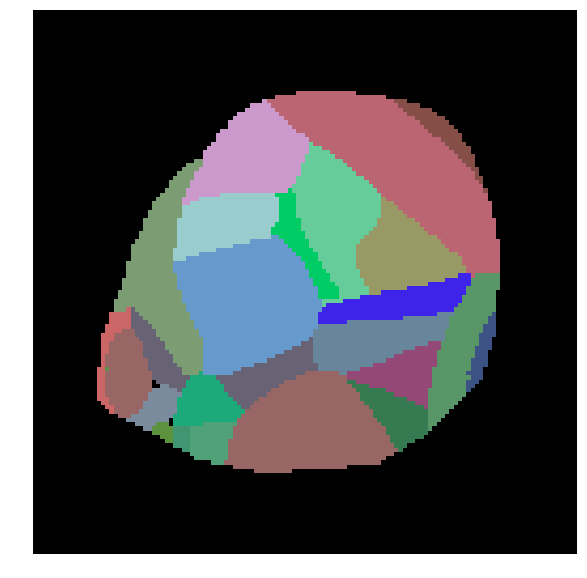

In [78]:
m,n = mask.shape
out = np.zeros((m,n,3),dtype='uint8')
for i,k in enumerate(tx['mapped_rois']):
    r = tx['mapped_rois'][k]
    tmp = sum(sum(r>0))
    if tmp<20:print(k)
    h = hex_to_rgb(colors[k])
    out[r>0,:]=[h[0],h[1],h[2]]
im = Image.fromarray(out,mode='RGB')
fig= plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(out)

In [62]:
sum(sum(tx['mapped_rois']['VISp']>0))

1376

In [79]:
G = io.load('meso_cortex.pk')

In [185]:
m,n = rois['VISp'].shape
out = 255*np.ones((m,n,3),dtype='uint8')
out[:,:,0]= 0
out[:,:,2]= 0
vals = []
sensor = 'SSp-m'
for v,node in G.out_edges(sensor):
    if node not in rois.keys():continue
    vals+=[(node,G[v][node]['weight'])]
mx = max([xx[1] for xx in vals])
mn = min([xx[1] for xx in vals])
try:
    r = rois[sensor]
    out[r>0,:]=[255,0,0]
except KeyError:
    pass
for i,k in enumerate(rois):
    if k==sensor:continue
    r = rois[k]
    out[r>0,:]=[0,0,255]
for roi,w in vals:
    r = rois[roi]
    f = 255-int(255*(w-mn)/mx-mn)
    out[r>0,:]=[f,f,f]
    
lout = 255*np.ones((m,n,3),dtype='uint8')
lout[:,:,0]= 0
lout[:,:,2]= 0
vals = []
for v,node in G.out_edges(sensor):
    if node not in rois.keys():continue
    vals+=[(node,G[v][node]['distance'])]
mx = max([xx[1] for xx in vals])
mn = min([xx[1] for xx in vals])
try:
    r = rois[sensor]
    lout[r>0,:]=[255,0,0]
except KeyError:
    pass
for i,k in enumerate(rois):
    if k==sensor:continue
    r = rois[k]
    lout[r>0,:]=[0,0,255]
for roi,w in vals:
    r = rois[roi]
    f = 255-int(255*(w-mn)/mx-mn)
    lout[r>0,:]=[f,f,f]

Text(0.5,1,'Connection distance')

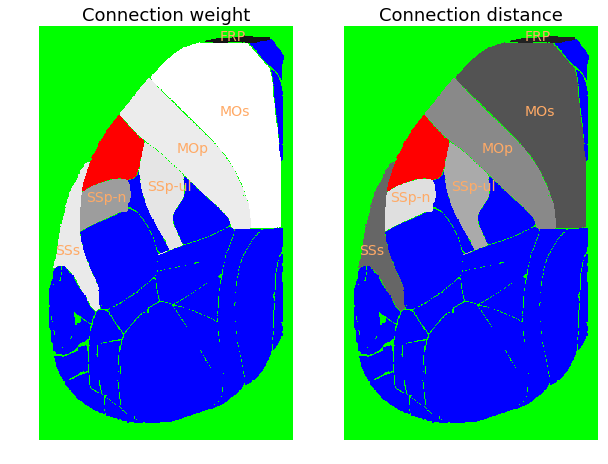

In [186]:
fig,ax= plt.subplots(1,2,figsize=(10,10))
ax[0].axis('off')
ax[1].axis('off')
for t,co in txts.items():
    if t in [xx[0] for xx in vals]:
        ax[0].text(co[0]-45,co[1],t,color='#FFAA66',fontsize=14)
        ax[1].text(co[0]-45,co[1],t,color='#FFAA66',fontsize=14)
ax[0].imshow(out)
ax[1].imshow(lout)
ax[0].set_title('Connection weight',fontsize=18)
ax[1].set_title('Connection distance',fontsize=18)